In [70]:
# fix Kanye Data
# random checking of song data (double check collection algo)
# new dataset with averages for each artists 
# classificaion with genre and song characteristics

import os
import pandas as pd
import matplotlib.pyplot as plt
os.chdir('/Users/garcgabe/Downloads/side work/Artists')

In [71]:
# Fill artist list with artist names that are contained in the directory
artists = []
for i in os.listdir():
    if 'Main' in i:
        artists.append(i.split('Main')[0])

In [72]:
# Create main DataFrame to populate with artist song data
main = pd.DataFrame()
# For each artist, add data to main DF
for artist in artists:
    df = pd.read_excel(str(artist)+'Main.xlsx')
    df.columns = ['Title', 'Lyrics', 'PopIndex', 'PageViews', 'popularity', 'dance',
       'energy', 'loudness', 'valence', 'tempo', 'instru', 'speech']
    df.index = df['Title']
    df = df.drop(['Title', 'PopIndex'], axis=1)
    df['artist'] = str(artist)
    main = pd.DataFrame.append(main,df)

In [73]:
#artists

In [74]:
main.sort_values('dance', ascending=False).head(10)

,Lyrics,PageViews,popularity,dance,energy,loudness,valence,tempo,instru,speech,artist
Title,,,,,,,,,,,
Surf,"[Verse 1: Vince Staples] Broken home, all I ha...",41517,38,0.976,0.493,-12.867,0.617,121.985,0.013900,0.272,VinceStaples
Bad Bad Bad,[Intro] Wheezy outta here [Chorus: Young Thug...,303729,69,0.974,0.596,-8.888,0.892,111.959,0.000000,0.184,YoungThug
Feed Tha Streets 2,"[Intro] Bitch, I done married the racks Bitch,...",100103,54,0.971,0.614,-5.844,0.270,112.994,0.000000,0.113,RoddyRicch
Feed tha Streets,"[Intro] Whoa, ooh Whoa, ooh Yeah, yeah, yeah, ...",59548,54,0.971,0.614,-5.844,0.270,112.994,0.000000,0.113,RoddyRicch
RIP Young,"[Intro] Mane, you know whats going, you got ch...",63552,71,0.971,0.677,-6.895,0.580,120.027,0.000022,0.092,IsaiahRashad
​good day,"[Intro: Lord Infamous] I think of murder, murd...",169736,46,0.966,0.519,-5.682,0.119,122.195,0.000000,0.306,21Savage
Pure Cocaine,"[Chorus] When your wrist like this, you dont c...",352790,70,0.964,0.487,-6.071,0.107,127.050,0.000007,0.421,LilBaby
Low Down,"[Intro] (Cook that shit up, Quay) [Verse 1] G...",99054,60,0.962,0.619,-5.562,0.154,127.958,0.000000,0.405,LilBaby
Whats the Move,[Intro: Young Thug] (BL$$D) I just let lil mam...,204066,57,0.961,0.438,-7.877,0.412,124.018,0.000000,0.310,YoungThug


In [75]:
# for each artist,
# get their songs, then return the average for each characteristic

# create array for new DF index
names = []
pop_avg, dance_avg, energy_avg, loudness_avg, valence_avg, tempo_avg = ([] for i in range(6))
for artist in main['artist'].unique():
    # add artist name 
    names.append(artist)
    # get dataframe of just their songs
    curr = main[main['artist']==artist]
    # gets averages for each artist and rounds to 3 decimals
    pop_avg.append(round( curr['popularity'].mean(),3) )
    dance_avg.append(round( curr['dance'].mean(),3) )
    energy_avg.append(round( curr['energy'].mean(),3) )
    loudness_avg.append(round( curr['loudness'].mean(),3) )
    valence_avg.append(round( curr['valence'].mean(),3) )
    tempo_avg.append(round( curr['tempo'].mean(),3) )

# assign key as ColName, values as the arrays for DF creation
load = {'Avg Pop':pop_avg, 'Avg Dance':dance_avg, 'Avg Energy':energy_avg, 
        'Avg Loudness':loudness_avg, 'Avg Valence':valence_avg, 
        'Avg Tempo':tempo_avg}
# new DF with index as names, data as the dictionary arrays
df_avg = pd.DataFrame(data=load, index=names)
        

In [76]:
df_avg.head(5)

,Avg Pop,Avg Dance,Avg Energy,Avg Loudness,Avg Valence,Avg Tempo
BigSean,52.975,0.665,0.701,-5.843,0.408,117.771
JuiceWRLD,73.486,0.668,0.633,-5.686,0.381,132.676
PushaT,42.200,0.615,0.711,-5.478,0.390,115.213
TrippieRedd,61.178,0.676,0.571,-7.874,0.388,128.488
Eminem,68.000,0.753,0.761,-4.643,0.511,121.376


In [77]:
# 5 artists with the happiest songs on average ("happy" according to Spotify)
df_avg.sort_values('Avg Valence', ascending=False)[0:5]

,Avg Pop,Avg Dance,Avg Energy,Avg Loudness,Avg Valence,Avg Tempo
DaBaby,59.956,0.826,0.673,-5.663,0.668,128.244
Nas,48.267,0.657,0.750,-6.155,0.569,108.649
IsaiahRashad,53.025,0.691,0.669,-7.443,0.566,118.401
YoungBoyNeverBrokeAgain,57.711,0.718,0.666,-6.123,0.530,137.137
JAY-Z,51.800,0.640,0.748,-5.449,0.527,112.453


In [78]:
# 5 artists with the saddest songs on average ("sad" according to Spotify)
df_avg.sort_values('Avg Valence')[0:5]

,Avg Pop,Avg Dance,Avg Energy,Avg Loudness,Avg Valence,Avg Tempo
TravisScott,67.511,0.672,0.621,-5.043,0.293,126.757
Future,56.444,0.738,0.543,-7.198,0.303,131.319
LilBaby,57.780,0.745,0.568,-6.894,0.335,126.024
21Savage,53.600,0.833,0.532,-8.341,0.350,129.811
Drake,67.020,0.693,0.513,-8.801,0.358,125.262


In [79]:
df_avg.corr()
# Strong correlation between (tempo, dance), (energy, loudness)
# Moderate correlation between (energy, dance), (valence, energy)

,Avg Pop,Avg Dance,Avg Energy,Avg Loudness,Avg Valence,Avg Tempo
Avg Pop,1.000000,0.044744,-0.212318,0.055993,-0.192201,0.229677
Avg Dance,0.044744,1.000000,-0.362447,-0.075366,-0.009694,0.714833
Avg Energy,-0.212318,-0.362447,1.000000,0.743465,0.541451,-0.348735
Avg Loudness,0.055993,-0.075366,0.743465,1.000000,0.223592,0.008064
Avg Valence,-0.192201,-0.009694,0.541451,0.223592,1.000000,-0.224238
Avg Tempo,0.229677,0.714833,-0.348735,0.008064,-0.224238,1.000000


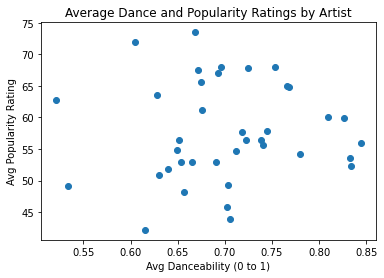

In [80]:
plt.scatter('Avg Dance', 'Avg Pop', data=df_avg)
plt.title("Average Dance and Popularity Ratings by Artist")
plt.xlabel("Avg Danceability (0 to 1)")
plt.ylabel("Avg Popularity Rating")
plt.show()

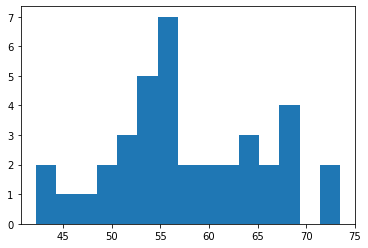

JuiceWRLD       73.486
KanyeWest       71.960
PopSmoke        68.060
Eminem          68.000
PoloG           67.825
TravisScott     67.511
Drake           67.020
J.Cole          65.622
PlayboiCarti    65.025
Name: Avg Pop, dtype: float64

In [81]:
plt.hist(df_avg['Avg Pop'],bins=15)
plt.show()
# Kanye and Juice World with the highest average song popularity
df_avg[df_avg['Avg Pop']>65]['Avg Pop'].sort_values(ascending=False)